In [24]:
import pickle
import pandas as pd
from collections import Counter
import numpy as np
import nltk
import os
import string
# from tqdm import tqdm



class POS_posts_analye():

    def __init__(self, path):
        self.data = self.read_pkl(path)
        self.punctuation = string.punctuation
        # self.csv_path = '../data_analy/pos_tags_text.csv'
        self.csv_path = '../data_analy/pos_tags_math_len.csv'
    
    # 读取pkl文件
    def read_pkl(self, file_path):
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        return data
    
    # 得到文本的所有词性标注
    def get_posTags(self):
        pos_tags = []
        for i in range(len(self.data)):
            for j in range(len(self.data[i]['subreddit'])):
                content  = self.contents_elements(self.data[i]['subreddit'][j])
                content = ''.join(pos for pos in content[0] if pos not in self.punctuation)
                tagged_text = nltk.pos_tag(nltk.word_tokenize(content))
                for word, tag in tagged_text:
                    if tag not in pos_tags:
                        pos_tags.append(tag)
        return pos_tags
                      


    # 将reddit_json中的subreddit中set集合转化为列表
    def contents_elements(self,data_set):
      # 验证数据类型
      # print(f"Data type: {type(data_set)}")
      # 如果是集合，则转换为列表并打印
      if isinstance(data_set, set):
          data_list = list(data_set)
          return data_list
      else:
          print("Data is not a set.")


    def count_pos(self):

        # 进行保存,判断是否存在这个csv文件
        if not os.path.exists(self.csv_path):
                #   得到每个帖子的词性标注特征
            pos_tags = self.get_posTags()
            # 统计每个词性标注的数量
            pos_counts = {}
            tag_dict, tag_count_body = {}, {}
            for tag in pos_tags:
                tag_dict[tag] = 0
                tag_count_body[tag] = []
            for i in range(len(self.data)):
                posts_length = len(self.data[i]['subreddit'])

                print(tag_dict,'开始统计')
                length = 0
                for tag in pos_tags:
                    tag_dict[tag] = 0

                content_len = len(self.data[i]['subreddit'])
                for j in range(len(self.data[i]['subreddit'])):
                    pos_counts = {}
                    for tag in pos_tags:
                        pos_counts[tag] = 0
                    content  = self.contents_elements(self.data[i]['subreddit'][j])
                    content = ''.join(pos for pos in content[0] if pos not in self.punctuation)
                    tagged_text = nltk.pos_tag(nltk.word_tokenize(content))
                    # length += len(tagged_text)
                    length = len(tagged_text)
                    for word, tag in tagged_text:
                            pos_counts[tag] += 1

                    for key, value in pos_counts.items():
                        if length != 0:
                            # pos_counts[key] = 0
                            pos_counts[key] = value / length

                    for key, value in pos_counts.items():
                        tag_dict[key] += value

                        

                        # tag_dict[key] = value / posts_length

                # 计算每个用户帖子级别POS向量       
                for key, value in tag_dict.items():
                        tag_dict[key] = value / content_len
                        # tag_dict[key] = value / posts_length

                for count, tag in zip(tag_dict.values(), tag_dict.keys()):
                    # 将每个用户的pos向量进行记录
                    tag_count_body[tag].append(count)
            # 将tag_count_body转化为DataFrame
            tag_count_df = pd.DataFrame(tag_count_body)
            tag_count_df.to_csv(self.csv_path, index=False)
        else:
            print('pos_tags.csv already exists')
            tag_count_df = pd.read_csv(self.csv_path)
        return tag_count_df
    
    def get_pos_tags(self):
        tag_count_df = pd.read_csv(self.csv_path)
        return tag_count_df
    
    # 计算每个用户的POS向量
    def get_user_pos(self):
        pos_tags   = self.count_pos()
        return pos_tags
    




pos_posts = POS_posts_analye(path='../data/reddit_json.pkl')
# pos_tags = pos_posts.get_user_pos()
pos_posts.count_pos()
                     


      


# 



{'PRP$': 0, 'RB': 0, 'DT': 0, 'JJ': 0, 'NN': 0, 'CC': 0, 'VB': 0, 'VBG': 0, 'IN': 0, 'NNP': 0, 'NNS': 0, 'PRP': 0, 'VBP': 0, 'MD': 0, 'TO': 0, 'VBZ': 0, 'CD': 0, 'VBD': 0, 'VBN': 0, 'RP': 0, 'WP': 0, 'WRB': 0, 'FW': 0, 'WDT': 0, 'PDT': 0, 'JJR': 0, 'RBR': 0, 'JJS': 0, 'EX': 0, 'RBS': 0, 'NNPS': 0, 'UH': 0, 'WP$': 0, '$': 0, "''": 0, 'POS': 0} 开始统计
{'PRP$': 0.030303030303030304, 'RB': 0.06818181818181818, 'DT': 0.06818181818181818, 'JJ': 0.05303030303030303, 'NN': 0.16666666666666666, 'CC': 0.05303030303030303, 'VB': 0.09090909090909091, 'VBG': 0.030303030303030304, 'IN': 0.11363636363636363, 'NNP': 0.05303030303030303, 'NNS': 0.030303030303030304, 'PRP': 0.07575757575757576, 'VBP': 0.03787878787878788, 'MD': 0.03787878787878788, 'TO': 0.022727272727272728, 'VBZ': 0.022727272727272728, 'CD': 0.007575757575757576, 'VBD': 0.007575757575757576, 'VBN': 0.007575757575757576, 'RP': 0.022727272727272728, 'WP': 0.0, 'WRB': 0.0, 'FW': 0.0, 'WDT': 0.0, 'PDT': 0.0, 'JJR': 0.0, 'RBR': 0.0, 'JJS': 0

PRP$        RB        DT        JJ        NN        CC        VB  \
0    0.030303  0.068182  0.068182  0.053030  0.166667  0.053030  0.090909   
1    0.023366  0.080625  0.064162  0.074456  0.107404  0.042547  0.066299   
2    0.016720  0.041888  0.066535  0.048364  0.099030  0.034287  0.140640   
3    0.026129  0.099183  0.063060  0.053639  0.114238  0.025083  0.071272   
4    0.027778  0.077020  0.064845  0.072330  0.107774  0.027146  0.039394   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.032314  0.046410  0.095327  0.041812  0.174209  0.038801  0.057975   
496  0.033816  0.040192  0.080300  0.036687  0.157946  0.050205  0.065516   
497  0.034256  0.085871  0.059362  0.054505  0.116112  0.044518  0.082323   
498  0.015945  0.104699  0.042400  0.043791  0.100687  0.056897  0.080989   
499  0.025568  0.062500  0.079545  0.068182  0.119318  0.042614  0.039773   

          VBG        IN       NNP  ...       RBR       JJS        EX  \
0    0.030303  0.113636  0.053030  ...  0.000000  0.000000  0.000000   
1    0.029047  0.103730  0.022640  ...  0.001953  0.002827  0.000202   
2    0.022119  0.106134  0.013882  ...  0.002381  0.003637  0.007600   
3    0.018112  0.111584  0.026536  ...  0.000000  0.006396  0.010334   
4    0.058874  0.109921  0.062284  ...  0.000000  0.002525  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
495  0.025688  0.083027  0.027354  ...  0.000914  0.006893  0.002631   
496  0.014409  0.097091  0.056829  ...  0.000000  0.001253  0.000000   
497  0.021548  0.091398  0.049442  ...  0.001405  0.004108  0.003145   
498  0.009814  0.084773  0.036418  ...  0.000000  0.001064  0.000000   
499  0.031250  0.144886  0.031250  ...  0.005682  0.002841  0.000000   

          RBS      NNPS        UH  WP$    $   ''  POS  
0    0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  
1    0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  
2    0.002513  0.000000  0.000000  0.0  0.0  0.0  0.0  
3    0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  
4    0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  
..        ...       ...       ...  ...  ...  ...  ...  
495  0.000000  0.000000  0.000455  0.0  0.0  0.0  0.0  
496  0.000000  0.000000  0.007120  0.0  0.0  0.0  0.0  
497  0.000059  0.000127  0.000000  0.0  0.0  0.0  0.0  
498  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  
499  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  

[500 rows x 36 columns]

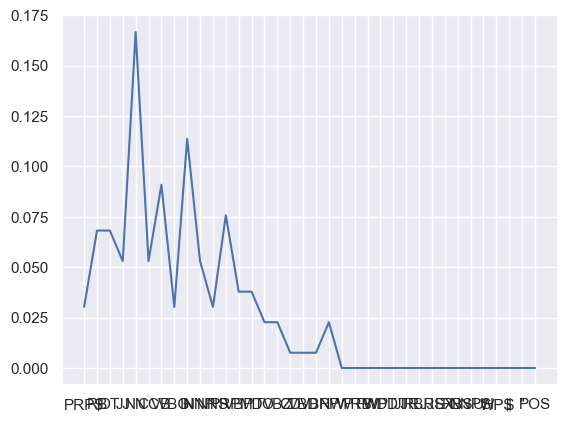

In [13]:
# 读取csv文件
import pandas as pd
pos_tags = pd.read_csv('../data_analy/pos_tags_averge.csv')

user = pd.read_csv('../data/reddit_500.csv')

# 找早user中label为0的用户索引值
user_0 = pos_tags[user['Label'] == 0]

# 用折线图分析user_0中的第一个的词性标注情况
# import matplotlib.pyplot as plt

# plt.plot(user_0.iloc[0])

















In [29]:
# 得到情绪字典，得到用户的情绪向量
# import numpy as np

# 读取情绪字典的text文件
def read_emotion_dict(file_path):
    with open(file_path, 'r') as f:
        data = f.readlines()
    return data

NRC_emotion = read_emotion_dict('../data/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt')

# 得到情绪字典
emotion_dict = {}

for i in range(len(NRC_emotion)):
    data = NRC_emotion[i].strip().split('\t')
    if data[2] == '1':
        if data[1] not in emotion_dict:
            emotion_dict[data[1]] = set()
        emotion_dict[data[1]].add(data[0])

# 将情绪以PKL文件的形式保存
import pickle
with open('../data_analy/emotion_dict.pkl', 'wb') as f:
    pickle.dump(emotion_dict, f)

# 读取情绪字典
def read_pkl(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

emotion_dict = read_pkl('../data_analy/emotion_dict.pkl')

# 得到fea类别的情绪词
def get_fea_emotion_words(emotion_dict, fea):
    fea_emotion_words = []
    for key, value in emotion_dict.items():
        if key in fea:
            fea_emotion_words.extend(value)
    return fea_emotion_words

# 得到每个用户的情绪向量

fear = get_fea_emotion_words(emotion_dict, 'fear')
anger = get_fea_emotion_words(emotion_dict, 'anger')
sadness = get_fea_emotion_words(emotion_dict, 'sadness')
joy = get_fea_emotion_words(emotion_dict, 'joy')
trust = get_fea_emotion_words(emotion_dict, 'trust')
disgust = get_fea_emotion_words(emotion_dict, 'disgust')
anticipation = get_fea_emotion_words(emotion_dict, 'anticipation')
surprise = get_fea_emotion_words(emotion_dict, 'surprise')
positive = get_fea_emotion_words(emotion_dict, 'positive')
negative = get_fea_emotion_words(emotion_dict, 'negative')


print(len(fear), len(anger), len(sadness), len(joy), len(trust), len(disgust), len(anticipation), len(surprise),len(positive), len(negative ))

# 总计有多少个情绪词
emotion_words = set(fear + anger + sadness + joy + trust + disgust + anticipation + surprise)
print(len(emotion_words))

# 将每个情绪向量词的数量进行相加

emotions_count = len(fear) + len(anger) + len(sadness) + len(joy) + len(trust) + len(disgust) + len(anticipation) + len(surprise)+ len(positive) + len(negative)
print(emotions_count)


1474 1245 1187 687 1230 1056 837 532 2308 3316
4454
13872


In [44]:
# 构建情绪向量
import string   
# 读取pkl文件
def read_pkl(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

data = read_pkl('../data/reddit_clean.pkl')
emotion_dict = read_pkl('../data_analy/emotion_dict.pkl')

# 得到用户的情绪特征向量
tag_dict, tag_count_body = {}, {}

for key in emotion_dict.keys():

    # tag_dict[key] = 0
    tag_count_body[key] = []

for i in range(len(data)):
    length = 0
    for key in emotion_dict.keys():
        tag_dict[key] = 0

    content_length = len(data[i]['subreddit'])
    for j in range(len(data[i]['subreddit'])):
        content = data[i]['subreddit'][j]
        content = content.split()
        print(content)
        for key,words in emotion_dict.items():
            for word in words:
                if word in content:
                    tag_dict[key] += 1

        for key, value in tag_dict.items():
            length += value
    


        for count, tag in zip(tag_dict.values(), tag_dict.keys()):
            if length != 0:
                tag_dict[tag] = count / length


    for count,tag in zip(tag_dict.values(), tag_dict.keys()):
        if content_length != 0:
            tag_count_body[tag].append(count / content_length)
        

    # for key, value in tag_dict.items():
    #     tag_count_body[key].append(value)
            
    # for count in tag_dict.values():
    #     tag_count_body[tag].append(count)

# 将tag_count_body转化为DataFrame
tag_count_df = pd.DataFrame(tag_count_body)
tag_count_df.to_csv('../data_analy/emotion_tags_averge_len.csv', index=False)



        


    # for key, value in tag_dict.items():
    #     length += value
    
    # for count, tag in zip(tag_dict.values(), tag_dict.keys()):



#         for word in content:
#             if word in emotion_dict[key]:
#                 tag_dict[key] += 1

                
#         length += len(content)
#     for count, tag in zip(tag_dict.values(), tag_dict.keys()):
#         tag_dict[tag] = count / length
#     for count in tag_dict.values():
#         tag_count_body[tag].append(count)

# # 将tag_count_body转化为DataFrame
# tag_count_df = pd.DataFrame(tag_count_body)
# tag_count_df.to_csv('../data_analy/emotion_tags_averge.csv', index=False)

# 读取csv文件
        
    #     content = data[i][j]
    #     content = ''.join(pos for pos in content[0] if pos not in string.punctuation)
    #     tagged_text = nltk.pos_tag(nltk.word_tokenize(content))
    #     length += len(tagged_text)
    #     for word, tag in tagged_text:
    #         if word in emotion_dict[key]:
    #             tag_dict[key] += 1
    # for count, tag in zip(tag_dict.values(), tag_dict.keys()):
    #     tag_dict[tag] = count / length
    # for count in tag_dict.values():
    #     tag_count_body[tag].append(count)
    
    


['it', 'not', 'a', 'viable', 'option', 'and', 'youll', 'be', 'leaving', 'your', 'wife', 'behind', 'youd', 'pain', 'her', 'beyond', 'comprehensionit', 'suck', 'worrying', 'about', 'money', 'i', 'know', 'that', 'first', 'hand', 'it', 'can', 'definitely', 'feel', 'hopeless', 'a', 'you', 'seem', 'to', 'be', 'tired', 'aware', 'of', 'your', 'wife', 'might', 'need', 'to', 'chip', 'in', 'financially', 'i', 'know', 'time', 'is', 'an', 'issue', 'but', 'even', '1015', 'hour', 'a', 'asthenia', 'could', 'alleviate', 'a', 'lot', 'of', 'the', 'pressure', 'in', 'the', 'meantime', 'get', 'your', 'shit', 'together', 'write', 'that', 'resume', 'tomorrow', 'no', 'excuse', 'get', 'it', 'done', 'and', 'send', 'it', 'out', 'whether', 'you', 'believe', 'in', 'some', 'sort', 'of', 'powerful', 'being', 'or', 'force', 'governing', 'thing', 'or', 'not', 'thing', 'really', 'do', 'work', 'themselves', 'out', 'this', 'is', 'a', 'big', 'test', 'for', 'you', 'and', 'youll', 'pull', 'through', 'just', 'try', 'to', 'sta

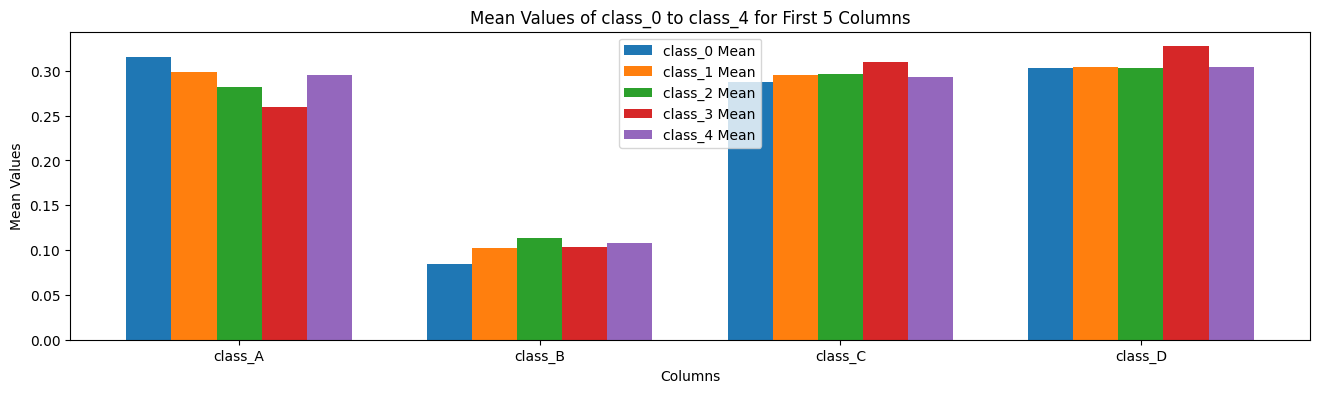

In [13]:

# 读取csv文件
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_csv(file_path):
    data = pd.read_csv(file_path)
    return data

reddit_data = read_csv('../data/reddit_500.csv')
# 得到标签值
label = reddit_data['Label']

# 将其中为0的值的索引值找出来
user_0 = reddit_data[label == 0].index
user_1 = reddit_data[label == 1].index
user_2 = reddit_data[label == 2].index
user_3 = reddit_data[label == 3].index
user_4 = reddit_data[label == 4].index

# pos_tags = read_csv('../data_analy/suicidal_feature_posts_all.csv')
pos_tags = read_csv('../data_analy/suicidal_feature_lengths1.csv')
# pos_tags = read_csv('../data_analy/emotion_tags_averge.csv')
# pos_tags = read_csv('../data_analy/emotion_tags_averge_len.csv')
# pos_tags = read_csv('../data_analy/pos_tags_math25.csv')
# pos_tags = read_csv('../data_analy/pos_tags_math_len.csv')
# pos_tags = read_csv('../data_analy/pos_tags.csv')

pos_0 = pos_tags.iloc[user_0]
pos_1 = pos_tags.iloc[user_1]
pos_2 = pos_tags.iloc[user_2]
pos_3 = pos_tags.iloc[user_3]
pos_4 = pos_tags.iloc[user_4]

# 计算每个用户的词性标注的平均值
# 计算均值并截取前5个
pos_0_mean = pos_0.mean()[:10]
pos_1_mean = pos_1.mean()[:10]
pos_2_mean = pos_2.mean()[:10]
pos_3_mean = pos_3.mean()[:10]
pos_4_mean = pos_4.mean()[:10]

# 提取标签和值
labels = pos_0_mean.index.tolist()
means = [pos_0_mean, pos_1_mean, pos_2_mean, pos_3_mean, pos_4_mean]

# 设置柱状图参数
x = np.arange(len(labels))  # 标签位置
width = 0.15  # 柱的宽度

# 绘制柱状图
fig, ax = plt.subplots()
# 设置图的大小
fig.set_size_inches(16, 4)

for i, mean in enumerate(means):
    ax.bar(x + i * width, mean, width, label=f'class_{i} Mean')

# 添加图表的其他元素
ax.set_xlabel('Columns')
ax.set_ylabel('Mean Values')
ax.set_title('Mean Values of class_0 to class_4 for First 5 Columns')
ax.set_xticks(x + width * 2)  # Adjust this depending on the number of groups
ax.set_xticklabels(labels)
ax.legend()

# 显示图表
plt.show()



# print(user_0)

In [68]:
# 读取pkl文件
import pickle
import numpy as np
from nltk.tokenize import sent_tokenize

def contents_elements(data_set):
    # 验证数据类型
    # print(f"Data type: {type(data_set)}")
    # 如果是集合，则转换为列表并打印
    if isinstance(data_set, set):
        data_list = list(data_set)
        return data_list
    else:
        print("Data is not a set.")


def remove_outliers(arr):
    mean = np.mean(arr)
    std_dev = np.std(arr)
    lower_bound = mean - 2 * std_dev  # 定义下界为平均值减两倍标准差
    upper_bound = mean + 2 * std_dev  # 定义上界为平均值加两倍标准差
    arr_without_outliers = [x for x in arr if x >= lower_bound and x <= upper_bound]
    return arr_without_outliers


def read_pkl(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data


data = read_pkl('../data/reddit_json.pkl')


# 找到data数据中的每个用户的帖子的句子的长度
length = {}
for i in range(len(data)):
    # length.append(len(data[i]['subreddit']))
    # 对每个帖子进行分句
    length[i] = []
    for j in range(len(data[i]['subreddit'])):
        content = contents_elements(data[i]['subreddit'][j])[0]
        # content = content.split()
        # 对content进行分句
        sentences = sent_tokenize(content)
        # print(sentences)
        s_s = len(sentences)
        length[i].append(s_s)
    # break
# print(length[0])

# 找到帖子长度中最大值、最小值的索引值
max_length = 0
min_length = 10000000 

max_index = 0

min_index = 0

for key, value in length.items():
    if max(value) > max_length:
        max_length = max(value)
        max_index = key
    if min(value) < min_length:
        min_length = min(value)
        min_index = key

print(max_index, min_index)


print(max_length, min_length)

# print(length)



# 找到data数据中的每个用户的帖子的长度
# length = []
# for i in range(len(data)):
#     length.append(len(data[i]['subreddit']))



# 得到每个用户的帖子的长度
# print(length)
# # print(len(length))

# # length = remove_outliers(length)

# # 找到帖子长度中最大值、最小值的索引值
# max_length = max(length)
# min_length = min(length)

# max_index = length.index(max_length)
# min_index = length.index(min_length)

# print(max_index, min_index)

# print(max_length, min_length)


# # print(length)
# # print(len(length))
# # 找出帖子长度中的异常值
# # print(np.mean(length))


# # 得到每个用户的帖子的平均长度
# print(sum(length) / len(length))

# 得到每个用户的帖子的最大长度

283 2
286 1


['behavior' 'better' 'cant' 'could' 'day' 'dont' 'even' 'feel' 'feeling'
 'find' 'friend' 'get' 'go' 'going' 'good' 'ha' 'help' 'hyperactive' 'im'
 'ive' 'know' 'life' 'like' 'lot' 'make' 'much' 'need' 'one' 'people'
 'really' 'right' 'say' 'see' 'someone' 'something' 'still' 'take' 'talk'
 'thats' 'thing' 'think' 'time' 'try' 'wa' 'want' 'way' 'work' 'would'
 'year' 'youre']


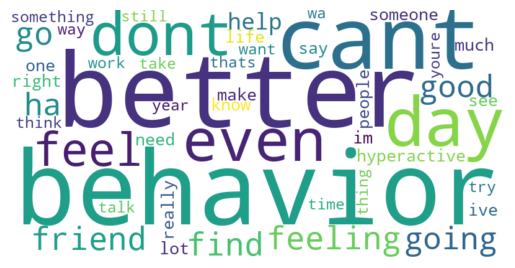

In [94]:
# 导入必要的库
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../data_analy/tfidf.csv')

# 得到data对象的列名
columns = data.columns.to_numpy()

print(columns)

# 假设您的列表数组包含了文本片段
texts = [
    "Python is a great programming language",
    "Word clouds are interesting",
    "Python is used for data analysis",
    "Data science is a growing field",
    "Programming can be fun"
]

# 将所有文本片段连接成一个长字符串
text = " ".join(columns)

# 创建词云对象并配置参数
wordcloud = WordCloud(
    width=800,   # 词云宽度
    height=400,  # 词云高度
    background_color='white',  # 背景颜色
    colormap='viridis',  # 颜色映射
    max_words=100  # 最大显示的单词数
).generate(text)  # 从文本生成词云

# 使用 matplotlib 展示词云
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # 隐藏坐标轴
plt.show()  # 显示词云


In [8]:
import pandas as pd
import numpy as np
import nltk
import string
import pickle


def join_sentences(sentences_list):
    # 使用空格作为分隔符来连接所有句子
    combined_text = " ".join(sentences_list)
    return combined_text

def get_reddit_csv(path):
    data = pd.read_csv(path)
    return data

def get_suicidal_dic(path):
    data = pd.read_csv(path)
    return data
# 读取reddit数据集
def get_reddit_data(path):
    with open(path, 'rb') as f:
        posts_data = pickle.load(f)
    return posts_data



# 获取自杀情绪特征
def get_suicidal_feature(path, suicidal_dic):
  print("Processing suicidal features ...")
  stopwords = set(nltk.corpus.stopwords.words('english'))
  data = get_reddit_data(path)
  suicidal_dic = get_suicidal_dic(suicidal_dic)
  computer = suicidal_dic['computer'].tolist()
  # 自杀类别
  suicidal_class = []
  for i in computer:
    if i not in suicidal_class:
      suicidal_class.append(i)
  
  # 找到词典中类别为A的词的索引,字典时csv文件
    class_A = suicidal_dic['lexicon'][suicidal_dic['computer'] == 'a'].values.tolist()
    class_B = suicidal_dic['lexicon'][suicidal_dic['computer'] == 'b'].values.tolist()
    class_C = suicidal_dic['lexicon'][suicidal_dic['computer'] == 'c'].values.tolist()
    class_D = suicidal_dic['lexicon'][suicidal_dic['computer'] == 'd'].values.tolist()
#   class_A = suicidal_dic['lexicon'][suicidal_dic['label'].str.contains('a')].values.tolist()
#   class_B = suicidal_dic['lexicon'][suicidal_dic['label'].str.contains('b')].values.tolist()
#   class_C = suicidal_dic['lexicon'][suicidal_dic['label'].str.contains('c')].values.tolist()
#   class_D = suicidal_dic['lexicon'][suicidal_dic['label'].str.contains('d')].values.tolist()

  # 对每个类别的词进行词性还原
  # 计算每个用户的自杀情绪特征

  # todo 按照帖子级别进行求平均词典的词
  suicidal_feature = []
  for i in range(len(data)):
      all_class_A_count = 0
      all_class_B_count = 0
      all_class_C_count = 0
      all_class_D_count = 0
      contents_len = len(data[i]['subreddit'])
      for j in range(len(data[i]['subreddit'])):
        #   contents = join_sentences(data[i]['subreddit'][j])
          contents = data[i]['subreddit'][j]
          contents = " ".join([word for word in contents.split() if word not in stopwords])
          contents = contents.split()
          class_A_count = 0
          class_B_count = 0
          class_C_count = 0
          class_D_count = 0
          for word in contents:
              if word in class_A:
                  class_A_count += 1
              if word in class_B:
                  class_B_count += 1
              if word in class_C:
                  class_C_count += 1
              if word in class_D:
                  class_D_count += 1
          word_len = class_A_count + class_B_count + class_C_count + class_D_count
          if word_len != 0:
              class_A_count = class_A_count / word_len
              class_B_count = class_B_count / word_len
              class_C_count = class_C_count / word_len
              class_D_count = class_D_count / word_len

          all_class_A_count += class_A_count
          all_class_B_count += class_B_count
          all_class_C_count += class_C_count
          all_class_D_count += class_D_count

      all_class_A_count = all_class_A_count / contents_len
      all_class_B_count = all_class_B_count / contents_len
      all_class_C_count = all_class_C_count / contents_len
      all_class_D_count = all_class_D_count / contents_len
      suicidal_feature.append([all_class_A_count, all_class_B_count, all_class_C_count, all_class_D_count])

  # 将自杀情绪特征转换为DataFrame
  suicidal_feature = pd.DataFrame(suicidal_feature, columns=['class_A', 'class_B', 'class_C', 'class_D'])

  # 保存自杀情绪特征
  suicidal_feature.to_csv('../data_analy/suicidal_feature_posts_all.csv', index=False)
          # suicidal_feature.append([class_A_count, class_B_count, class_C_count, class_D_count])

  #   # contents = join_sentences(data[i]['subreddit'])

  #   # contents_len = len(contents)
  #   # print(len(contents),'contents')
  #   # contents = " ".join([word for word in contents.split() if word not in stopwords])
  #   # contents = contents.split()
  #   # class_A_count = 0
  #   # class_B_count = 0
  #   # class_C_count = 0
  #   # class_D_count = 0
  #   # for word in contents:
  #   #   if word in class_A:
  #   #     class_A_count += 1
  #   #   if word in class_B:
  #   #     class_B_count += 1
  #   #   if word in class_C:
  #   #     class_C_count += 1
  #   #   if word in class_D:
  #       class_D_count += 1

  #   word_len = class_A_count + class_B_count + class_C_count + class_D_count

  #   if word_len != 0:
  #     class_A_count = class_A_count / word_len
  #     class_B_count = class_B_count / word_len
  #     class_C_count = class_C_count / word_len
  #     class_D_count = class_D_count / word_len
  #   suicidal_feature.append([class_A_count, class_B_count, class_C_count, class_D_count])

  # # 将自杀情绪特征转换为DataFrame
  # suicidal_feature = pd.DataFrame(suicidal_feature, columns=['class_A', 'class_B', 'class_C', 'class_D'])

  # # 保存自杀情绪特征
  # suicidal_feature.to_csv('../data_analy/suicidal_feature_lengths1.csv', index=False)

  print("Suicidal features are extracted successfully!")

  return suicidal_feature

reddit_data_path = '../data/reddit_500.csv'
data_path = '../data/reddit_clean.pkl'
NRC_path = '../data_analy/pos_tags_averge.csv'
pos_path = '../data_analy/pos_tags.csv'
suicidal_dic_path = '../data/Reddit_Suicide_Dictionary.csv'
suicidal_feature =  get_suicidal_feature(data_path, suicidal_dic_path)

Processing suicidal features ...
Suicidal features are extracted successfully!
